# Assignment A: Computer Vision (CS7GV1)
## Van Allen Bruns Jr - 19329560
#    

# Part 1: Histograms
## a. Read a RGB colour image (e.g. png) and display it.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img_bgr = cv2.imread('sydney.jpg', cv2.IMREAD_UNCHANGED)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title('Original image')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

<Figure size 640x480 with 1 Axes>

#### *Image loading from: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html

## b. Convert the RGB image into Lab colour system and display each component (L,a,b) as an grey level image.
### (See section 2.7.4 in http://www.ee.columbia.edu/ln/dvmm/publications/PhD_theses/jrsmith-thesis.pdf)

### i. Using math.

In [2]:
# XYZ conversion matrix
rgb_to_xyz = np.array([0.490, 0.310, 0.200, 0.177, 0.813, 0.011, 0.000, 0.010, 0.990])
rgb_to_xyz = rgb_to_xyz.reshape(3, 3)

# Set to the RGB image just to set a size
XYZ = img_rgb.copy()

for i in range(len(XYZ)):
    for j in range(len(XYZ[i])):
        XYZ[i][j] = rgb_to_xyz.dot(XYZ[i][j])
        
# For standard daylight illuminant D65
Xn = 95.047
Yn = 100.000
Zn = 108.883

X,Y,Z = cv2.split(XYZ)

#### *Xn, Yn, Zn from: https://www.textileschool.com/4527/basic-concepts-of-colour-measurement/4/

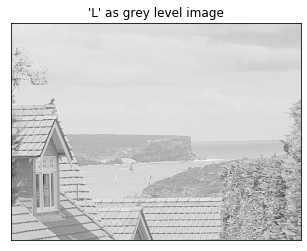

In [3]:
#Set to X just to set a size
L = X.copy()

L = 116 * (Y / Yn) ** (1. / 3) - 16

plt.imshow(L, cmap='gray')
plt.title('\'L\' as grey level image')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

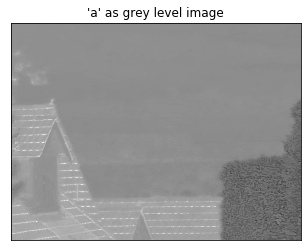

In [4]:
#Set to X just to set a size
a = X.copy()

a = 500 * ((X / Xn) ** (1. / 3) - (Y / Yn) ** (1. / 3))

plt.imshow(a, cmap='gray')
plt.title('\'a\' as grey level image')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

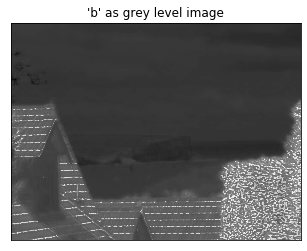

In [5]:
#Set to X just to set a size
b = X.copy()

b = 200 * ((Y / Yn) ** (1. / 3) - (Z / Zn) ** (1. / 3))
plt.imshow(b, cmap='gray')
plt.title('\'b\' as grey level image')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

### ii. Using OpenCV.

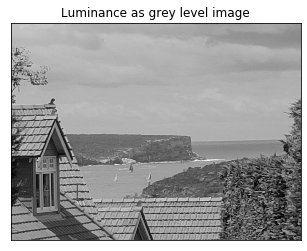

In [6]:
img_Lab = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2LAB)

L,a,b = cv2.split(img_Lab)

plt.imshow(L, cmap='gray')
plt.title('Luminance as grey level image')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

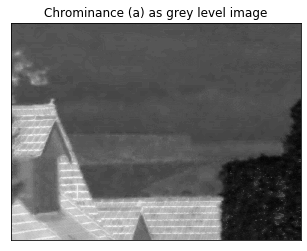

In [7]:
plt.imshow(a, cmap='gray')
plt.title('Chrominance (a) as grey level image')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

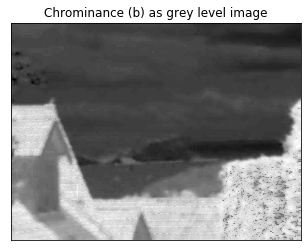

In [8]:
plt.imshow(b, cmap='gray')
plt.title('Chrominance (b) as grey level image')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

## c. Compute the spatial derivatives of the luminance component L in the horizontal and vertical direction using convolution by the derivatives of Gaussian filter. Display each of these derivatives as grey level images.

### The horizontal derivative really captures the edges that are more vertical than horizontal, as can be seen from the cliff face.

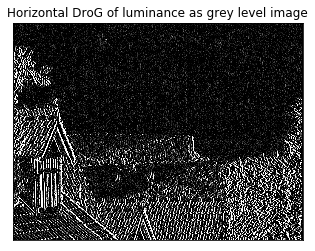

In [9]:
# 'Sobel operator is a joint Gaussian smoothing plus differentiation operation'
L_DroG_dx = cv2.Sobel(L,cv2.CV_8U,1,0,ksize=5)

plt.imshow(L_DroG_dx, cmap='gray')
plt.title('Horizontal DroG of luminance as grey level image')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

### The vertical derivative really captures the edges that are more horizontal than vertical, as can be seen from the shore below the cliff and shadows on the roof tiles.

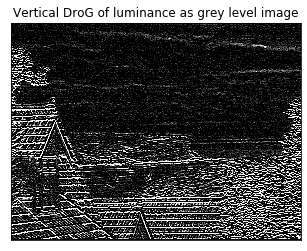

In [10]:
# 'Sobel operator is a joint Gaussian smoothing plus differentiation operation'
L_dy = cv2.Sobel(L,cv2.CV_8U,0,1,ksize=5)

plt.imshow(L_dy, cmap='gray')
plt.title('Vertical DroG of luminance as grey level image')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

#### *Example taken from: https://docs.opencv.org/master/d5/d0f/tutorial_py_gradients.html

## d. Compute a 2D histogram with the chrominance component (a,b) and display the histogram as a grey image (heat map) and/or as a 3D surface (bar plot).

### It's hard to see where the data of the chrominance actually lies from this, as the dominance of values right around 120 drowns out the rest.

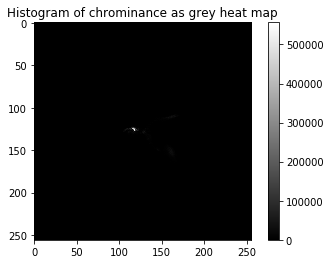

In [11]:
hist_2d_ab = cv2.calcHist([a, b], [0, 1], None, [256, 256], [0, 256, 0, 256])

plt.imshow(hist_2d_ab, cmap='gray')
plt.title('Histogram of chrominance as grey heat map')
plt.colorbar()
plt.show()

### Taking the log of the histogram helps to scale the data so we can see the rest. We now have values between 100 and 175.

/home/van/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


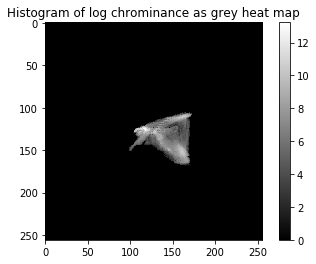

In [12]:
# Take the log of the histogram to better see the range where the data is located.
hist_2d_ab_log = np.log(hist_2d_ab)
hist_2d_ab_log[hist_2d_ab_log == -np.inf] = 0

plt.imshow(hist_2d_ab_log, cmap='gray')
plt.title('Histogram of log chrominance as grey heat map')
plt.colorbar()
plt.show()

#### *Example taken from: https://docs.opencv.org/master/dd/d0d/tutorial_py_2d_histogram.html

## e. Using a part of the image to compute a 2D histogram model with the chrominance component (a,b), compute a back projection map with this model histogram in the target image.
### (i.e. see BP1 section 5.3 in http://www.ee.columbia.edu/dvmm/publications/PhD_theses/jrsmith-thesis.pdf)

### This crop really shows the bush in the image when using back projection.

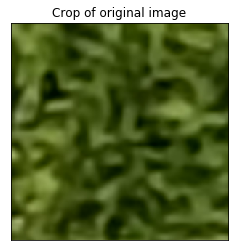

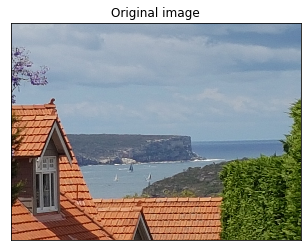

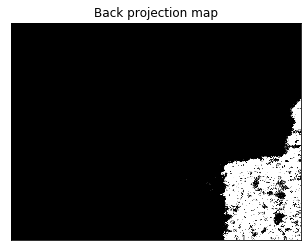

In [13]:
def backProjectionFromChrominanceCrop(crop, a, b):
    hist_2d_ab_crop = cv2.calcHist(crop, [0, 1], None, [256, 256], [0, 256, 0, 256])
    return cv2.calcBackProject([a, b], [0, 1], hist_2d_ab_crop, [0, 256, 0, 256], 1)

w = 300; h = 300; posx = 3000; posy = 2000

bushCrop = [a[posy:posy + h,posx:posx + w], b[posy:posy + h,posx:posx + w]]
bushBackProjection = backProjectionFromChrominanceCrop(bushCrop, a, b)

plt.imshow(img_rgb[posy:posy + h,posx:posx + w])
plt.title('Crop of original image')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

plt.imshow(img_rgb)
plt.title('Original image')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

plt.imshow(bushBackProjection, cmap='gray')
plt.title('Back projection map')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

### This crop of the boat doesn't help us to exactly find it. The image has been limited down considerably though.

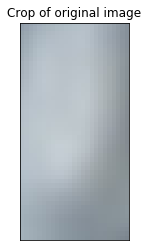

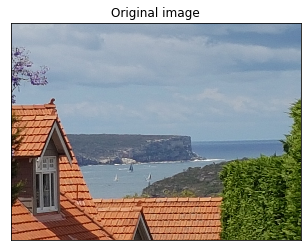

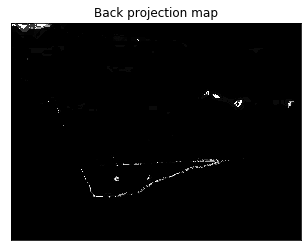

In [14]:
w = 25; h = 50; posx = 1450; posy = 2150

waterCrop = [a[posy:posy + h,posx:posx + w], b[posy:posy + h,posx:posx + w]]
waterBackProjection = backProjectionFromChrominanceCrop(waterCrop, a, b)

plt.imshow(img_rgb[posy:posy + h,posx:posx + w])
plt.title('Crop of original image')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

plt.imshow(img_rgb)
plt.title('Original image')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

plt.imshow(waterBackProjection, cmap='gray')
plt.title('Back projection map')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

### This really works for most of the roof.

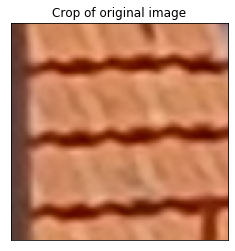

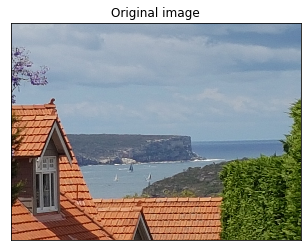

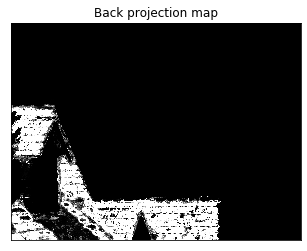

In [15]:
w = 300; h = 300; posx = 650; posy = 2000

windowCrop = [a[posy:posy + h,posx:posx + w], b[posy:posy + h,posx:posx + w]]
windowBackProjection = backProjectionFromChrominanceCrop(windowCrop, a ,b)

plt.imshow(img_rgb[posy:posy + h,posx:posx + w])
plt.title('Crop of original image')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

plt.imshow(img_rgb)
plt.title('Original image')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

plt.imshow(windowBackProjection, cmap='gray')
plt.title('Back projection map')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

## f. Perform histogram equalization using 1D histogram using the luminance L computed in a. Display the resulting image with enhanced contrast.
### (e.g. https://en.wikipedia.org/wiki/Histogram_equalization)

### Sun reflections and created shadows stand out more with luminance equalization.

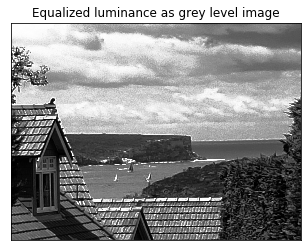

In [16]:
equalize_L = cv2.equalizeHist(L)

plt.imshow(equalize_L, cmap='gray')
plt.title('Equalized luminance as grey level image')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

## g. Evaluate the performance of these techniques with histograms (i.e. illustrate when it works, and when it does not work).

### Equalizing luminance really emphasizes places of reflection and shadow, as can be seen in the second image. This would have an application in helping to define normals for lighting and shading in graphics reconstruction from 2D images into rendered environments.

### Equalizing does add a decent amount of noise, and be visually identified in both images with equalization.

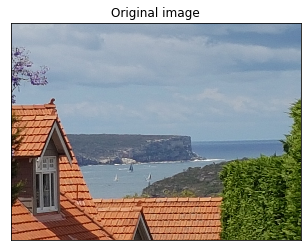

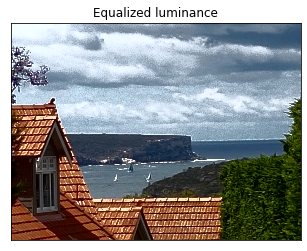

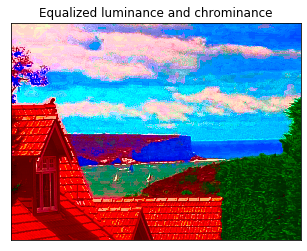

In [17]:
equalize_a = cv2.equalizeHist(a)
equalize_b = cv2.equalizeHist(b)

img_Lab_equalized_L = cv2.merge([equalize_L,a,b])
img_Lab_equalized_Lab = cv2.merge([equalize_L,equalize_a,equalize_b])

img_rgb_equalized_L = cv2.cvtColor(img_Lab_equalized_L, cv2.COLOR_LAB2RGB)
img_rgb_equalized_Lab = cv2.cvtColor(img_Lab_equalized_Lab, cv2.COLOR_LAB2RGB)

plt.imshow(img_rgb)
plt.title('Original image')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

plt.imshow(img_rgb_equalized_L)
plt.title('Equalized luminance')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

plt.imshow(img_rgb_equalized_Lab)
plt.title('Equalized luminance and chrominance')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

### Equalizing luminance and chrominance gives visual distinction between the different parts of the scene, as can be seen in the second image. This should be helpful in some context, though I wasn't able to produce improvement using back projection as I envisaged.

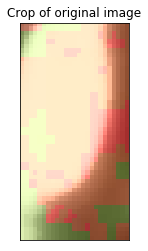

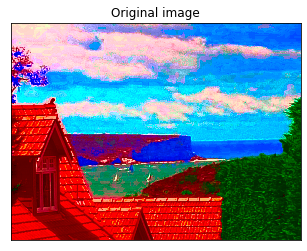

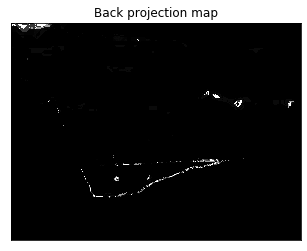

In [18]:
w = 25; h = 50; posx = 1450; posy = 2150

waterCrop = [equalize_a[posy:posy + h,posx:posx + w], equalize_b[posy:posy + h,posx:posx + w]]
waterBackProjection = backProjectionFromChrominanceCrop(waterCrop, equalize_a, equalize_b)

plt.imshow(img_rgb_equalized_Lab[posy:posy + h,posx:posx + w])
plt.title('Crop of original image')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

plt.imshow(img_rgb_equalized_Lab)
plt.title('Original image')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

plt.imshow(waterBackProjection, cmap='gray')
plt.title('Back projection map')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

### I really like this image of a horned toad, but no matter what I tried with back projection, I couldn't separate her from the rest of the image. Her camouflage worked too well.

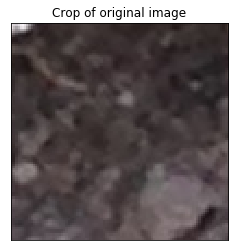

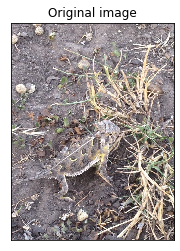

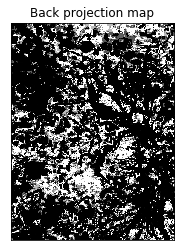

In [19]:
horned_toad_bgr = cv2.imread('horned_toad.jpeg', cv2.IMREAD_UNCHANGED)
horned_toad_rgb = cv2.cvtColor(horned_toad_bgr, cv2.COLOR_BGR2RGB)
horned_toad_Lab = cv2.cvtColor(horned_toad_bgr, cv2.COLOR_BGR2LAB)

horned_toad_L,horned_toad_a,horned_toad_b = cv2.split(horned_toad_Lab)

w = 100; h = 100; posx = 510; posy = 1110

toadCrop = [horned_toad_a[posy:posy + h,posx:posx + w], horned_toad_b[posy:posy + h,posx:posx + w]]
toadBackProjection = backProjectionFromChrominanceCrop(toadCrop, horned_toad_a, horned_toad_b)

plt.imshow(horned_toad_rgb[posy:posy + h,posx:posx + w])
plt.title('Crop of original image')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

plt.imshow(horned_toad_rgb)
plt.title('Original image')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

plt.imshow(toadBackProjection, cmap='gray')
plt.title('Back projection map')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

### Even edge detection couldn't do much to identify the horned toad.

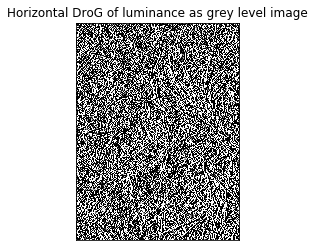

In [20]:
# 'Sobel operator is a joint Gaussian smoothing plus differentiation operation'
L_DroG_dx = cv2.Sobel(horned_toad_L,cv2.CV_8U,1,0,ksize=5)

plt.imshow(L_DroG_dx, cmap='gray')
plt.title('Horizontal DroG of luminance as grey level image')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

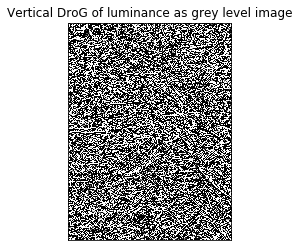

In [21]:
# 'Sobel operator is a joint Gaussian smoothing plus differentiation operation'
L_dy = cv2.Sobel(horned_toad_L,cv2.CV_8U,0,1,ksize=5)

plt.imshow(L_dy, cmap='gray')
plt.title('Vertical DroG of luminance as grey level image')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()